In [70]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import tensorflow as tf
import pandas as pd
import glob2
import os
from itertools import product
import numpy as np
import seaborn as sns

%matplotlib notebook
#%matplotlib

In [73]:
#log_dir='./logs/sv1R2_1117_101816_sv1R2gaussElu_testrun'
log_dir='./logs/R2Noisy_1118_003221_R2NoisyV2'
record_dir=os.path.join(log_dir,'records')

In [74]:
def split_posneg(real_val,binary_val):
    pos_real=real_val[  np.where(npY==+1)[0] ]
    neg_real=real_val[  np.where(npY==-1)[0] ]
    pos_bin=binary_val[ np.where(npY==+1)[0] ]
    neg_bin=binary_val[ np.where(npY==-1)[0] ]
    return pos_real,neg_real,pos_bin,neg_bin

npX=np.load(os.path.join(record_dir,'dataX.npy'))
npY=np.load(os.path.join(record_dir,'dataY.npy'))

Xpos,Xneg,Ypos,Yneg=split_posneg(npX,npY)

In [75]:
def get_path(name,log_dir=log_dir):
    listglob=glob2.glob(log_dir+'/records/wwatch*.npy')
    hasname=filter(lambda s:name in s[s.rfind('wwatch'):], listglob)
    if len(hasname)==1:
        return hasname[0]
    else:
        exactname='_'+name+'.'
        hasname=filter(lambda s:exactname in s[s.rfind('wwatch'):], listglob)
        if len(hasname)==1:
            return hasname[0]
        else:
            raise ValueError('Multiple matches',[hn[hn.rfind('/'):] for hn in hasname])


In [76]:
os.listdir(record_dir)

['dataY.npy',
 'wwatch_b2.npy',
 'wwatch_step.npy',
 'wwatch_W2.npy',
 'dataX.npy',
 'wwatch_b1.npy',
 'wwatch_delu.npy',
 'wwatch_u.npy',
 'wwatch_W1.npy']

In [77]:
W1=np.load(get_path('W1'))
dW2=np.load(get_path('delu'))
step=np.load(get_path('step'))

In [78]:
##Normalize Sizes##
wmax=W1.max(axis=0).max(axis=1)
wmin=W1.min(axis=0).min(axis=1)
xmax=npX.max(axis=0)
xmin=npX.min(axis=0)
dw2max=dW2.max(axis=0)
dw2min=dW2.min(axis=0)
wx_scale=(xmax-xmin)/(wmax-wmin)
print 'scale x/scale w',wx_scale

scale x/scale w [ 1.02208292  1.4366591 ]


<IPython.core.display.Javascript object>


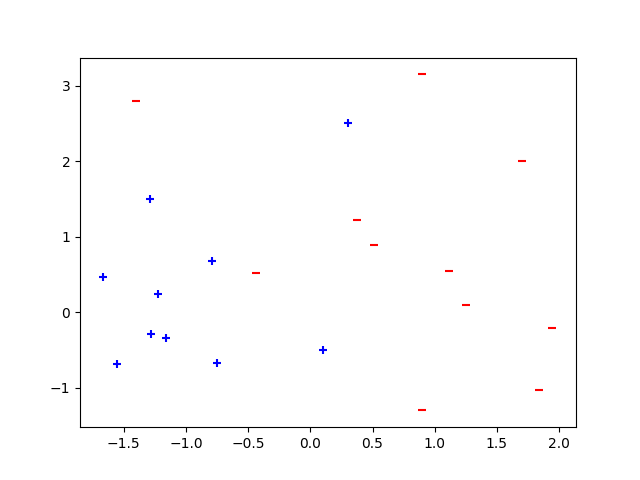

In [86]:
fig,ax=plt.subplots()

plt.scatter(Xpos[:,0],Xpos[:,1],marker='+',c='b')
plt.scatter(Xneg[:,0],Xneg[:,1],marker='_',c='r')
plt.savefig('./logs/R2Noisy_1118_003221_R2NoisyV2_contourf/records/scatter_data.pdf')
plt.savefig('./logs/R2Noisy_1118_003221_R2NoisyV2_contourf/records/scatter_data.jpg')

<IPython.core.display.Javascript object>


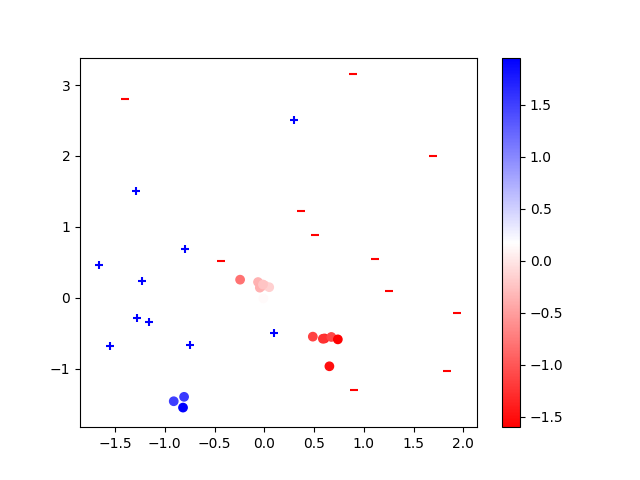

In [79]:
time=300
fig,ax=plt.subplots()

plt.scatter(Xpos[:,0],Xpos[:,1],marker='+',c='b')
plt.scatter(Xneg[:,0],Xneg[:,1],marker='_',c='r')
#plt.scatter(Xpos)
plt.scatter(W1[time,0,:],W1[time,1,:],c=dW2[time],cmap='bwr_r')
plt.colorbar()

In [80]:
plt.savefig(os.path.join(record_dir,'testplot.pdf'))

In [81]:
##Animation

In [82]:
#Does this have to be done before animation???
assert('ffmpeg' in animation.writers.list())#I guess you could use a diff one
Writer = animation.writers['ffmpeg']
#writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=3800)

<IPython.core.display.Javascript object>


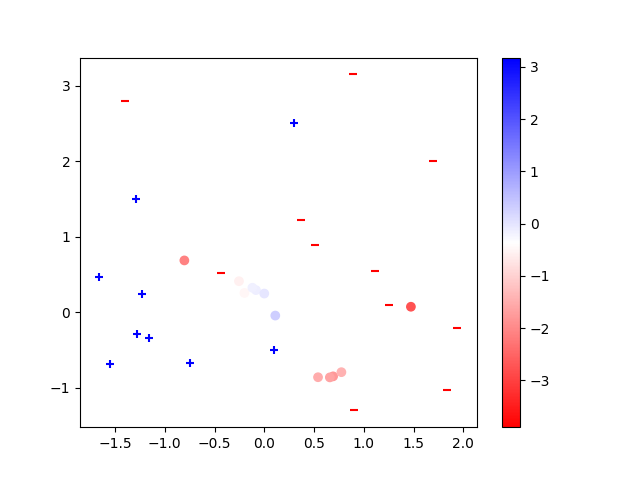

In [83]:
#How to normalize colors each iter
normalize=mpl.colors.Normalize(vmin=min(dw2min),vmax=max(dw2max))
cm_map=mpl.cm.ScalarMappable(norm=normalize,cmap=mpl.cm.bwr_r)

#%%capture
fig,ax=plt.subplots()
plt.scatter(Xpos[:,0],Xpos[:,1],marker='+',c='b')
plt.scatter(Xneg[:,0],Xneg[:,1],marker='_',c='r')

scat=plt.scatter(wx_scale[0]*W1[0,0,:],
                 wx_scale[1]*W1[0,1,:],
#                 c=dW2[0],cmap=cm_map )
#                 cm_map.to_rgba(dW2[0]) )
                 c=dW2[0],cmap='bwr_r',
                  norm=normalize)
#scat=plt.scatter(wx_scale[0]*W1[0,0,:],wx_scale[1]*W1[0,1,:],c=dW2[0],cmap='bwr_r')
plt.colorbar()
def animate(time):
    scat.set_offsets(np.c_[wx_scale[0]*W1[time,0,:],
                           wx_scale[1]*W1[time,1,:]])
    scat.set_color(cm_map.to_rgba(dW2[time]))
#    scat.set_facecolor(dW2[time])
#    scat.set_color(plt.cm.bwr_r(dW2[time]))

#    scat.draw()
#    plt.draw()
    #plt.scatter(W1[time,0,:],W1[time,1,:],c=dW2[time],cmap='bwr_r')
    #plt.setp(p.lines,linewidth=7)
ani = animation.FuncAnimation(fig, animate, frames=len(step), repeat=True,interval=10)

In [84]:
ani.save(os.path.join(record_dir,'TestAnimhighres.mp4'), writer=writer)

In [23]:
%matplotlib inline

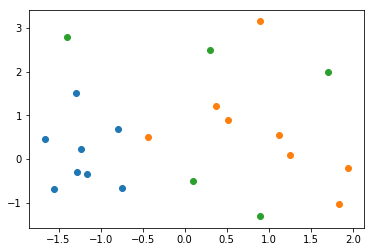

In [56]:
fig,ax=plt.subplots()
np.random.seed(27)
rX=np.random.rand(5,2)*4.-2.
#ax.scatter(rX[:,0],rX[:,1])
pX=np.random.multivariate_normal([-1.,0.]  ,[[0.3,0],[0,1.5]], 8)
ax.scatter(pX[:,0],pX[:,1])
nX=np.random.multivariate_normal([+1.,0.]  ,[[0.3,0],[0,1.5]], 8)
ax.scatter(nX[:,0],nX[:,1])
rX=np.array([[0.1,-0.5],
             [0.9,-1.3],
             [-1.4,2.8],
             [0.3,2.5],
             [1.7,2.0]])
ax.scatter(rX[:,0],rX[:,1])

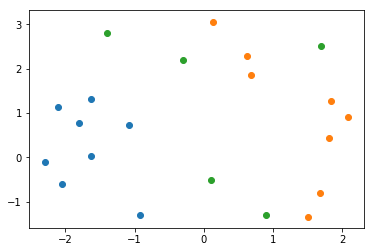

In [59]:
fig,ax=plt.subplots()
np.random.seed(22)
#ax.scatter(rX[:,0],rX[:,1])
pX=np.random.multivariate_normal([-1.5,0.]  ,[[0.3,0],[0,1.5]], 8)
ax.scatter(pX[:,0],pX[:,1])
nX=np.random.multivariate_normal([+1.5,0.]  ,[[0.3,0],[0,1.5]], 8)
ax.scatter(nX[:,0],nX[:,1])
rX=np.array([[0.1,-0.5],
             [0.9,-1.3],
             [-1.4,2.8],
             [-0.3,2.2],
             [1.7,2.5]])
ax.scatter(rX[:,0],rX[:,1])

### can we just randomly select the noise

<IPython.core.display.Javascript object>


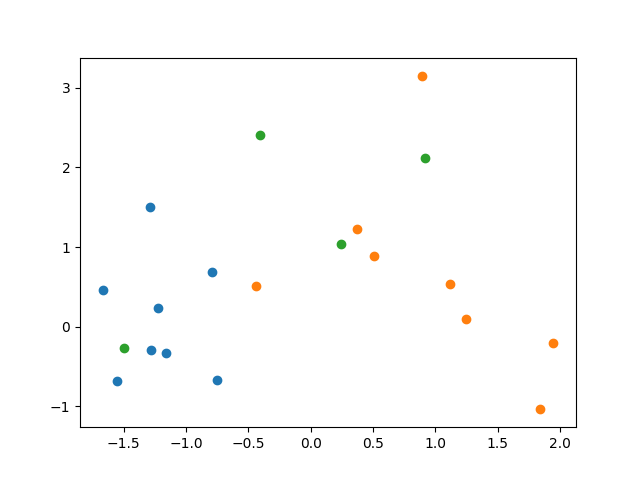

In [104]:
fig,ax=plt.subplots()
np.random.seed(27)#notice
rX=np.random.rand(5,2)*4.-2.
#ax.scatter(rX[:,0],rX[:,1])
pX=np.random.multivariate_normal([-1.,0.]  ,[[0.3,0],[0,1.5]], 8)
ax.scatter(pX[:,0],pX[:,1])
nX=np.random.multivariate_normal([+1.,0.]  ,[[0.3,0],[0,1.5]], 8)
ax.scatter(nX[:,0],nX[:,1])

np.random.seed(28)
rn=4
rX1=np.random.uniform(-2,2,rn)
rX2=np.random.uniform(-1,3,rn)
rX=np.c_[rX1,rX2]
ax.scatter(rX[:,0],rX[:,1])

In [105]:
rX

array([[ 0.91605497,  2.12523283],
       [ 0.24495841,  1.04397193],
       [-1.50013163, -0.26922657],
       [-0.40963053,  2.4140515 ]])

In [ ]:
fig.scatter

In [39]:
plt.subplots?
